<a href="https://colab.research.google.com/github/Navin321-alma/Appliances_energy_prediction_linear_regression/blob/main/Self_Appliances_Energy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data-driven prediction of energy use of appliances**
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions
were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the
temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for
10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.
Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
from a public data set from Reliable Prognosis (rp5.ru) and merged together with the
experimental data sets using the date and time column. Two random variables have been
included in the data set for testing the regression models and to filter out non-predictive attributes
(parameters)

date time year-month-day hour:minute:second

Appliances, energy use in Wh (Dependent variable)

lights, energy use of light fixtures in the house in Wh (Drop this column)
T1, Temperature in kitchen area, in Celsius
RH1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius RH2,
Humidity in living room area, in %

T3, Temperature in laundry room area
RH3, Humidity in laundry room area, in % 

T4, Temperature in office room, in Celsius RH4,
Humidity in office room, in %

T5, Temperature in bathroom, in Celsius
RH5, Humidity in bathroom, in % 

T6, Temperature outside the building (north side), in Celsius
RH6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius
RH7, Humidity in ironing room, in % 

T8, Temperature in teenager room 2, in Celsius RH8,
Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius
RH9, Humidity in parents room, in % 

To, Temperature outside (from Chievres weather station), in
Celsius 

Pressure (from Chievres weather station), in mm Hg RHout, Humidity outside (from
Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â°C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/capstone projects/data_application_energy.csv')

In [ ]:
dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
dataset.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [ ]:
dataset.shape

(19735, 29)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
dataset.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [ ]:
#number of null values in each column
dataset.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [ ]:
dataset.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:

dataset['lights'].value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: lights, dtype: int64

#**Dropping lights column beacause there are lot of 0 entries in the dataset**

In [ ]:
dataset.drop(['lights'], axis = 1 , inplace = True)

In [ ]:
numeric_features = dataset.describe().columns
numeric_features

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
dataset.head()

,date,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


**Converting percentage value of all the Relative humdities (RH) into decimals**

In [ ]:
def decimal(number):
  return number/100

In [ ]:
dataset[['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out']]=dataset[['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out']].apply(decimal)

In [ ]:
dataset.head()

,date,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,19.89,0.475967,19.2,0.447900,19.79,0.447300,19.000000,0.455667,17.166667,0.5520,7.026667,0.842567,17.200000,0.416267,18.2,0.489000,17.033333,0.4553,6.600000,733.5,0.92,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,19.89,0.466933,19.2,0.447225,19.79,0.447900,19.000000,0.459925,17.166667,0.5520,6.833333,0.840633,17.200000,0.415600,18.2,0.488633,17.066667,0.4556,6.483333,733.6,0.92,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,19.89,0.463000,19.2,0.446267,19.79,0.449333,18.926667,0.458900,17.166667,0.5509,6.560000,0.831567,17.200000,0.414333,18.2,0.487300,17.000000,0.4550,6.366667,733.7,0.92,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,19.89,0.460667,19.2,0.445900,19.79,0.450000,18.890000,0.457233,17.166667,0.5509,6.433333,0.834233,17.133333,0.412900,18.1,0.485900,17.000000,0.4540,6.250000,733.8,0.92,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,19.89,0.463333,19.2,0.445300,19.79,0.450000,18.890000,0.455300,17.200000,0.5509,6.366667,0.848933,17.200000,0.412300,18.1,0.485900,17.000000,0.4540,6.133333,733.9,0.92,5.666667,47.666667,4.9,10.084097,10.084097


#**Exploratory Data Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


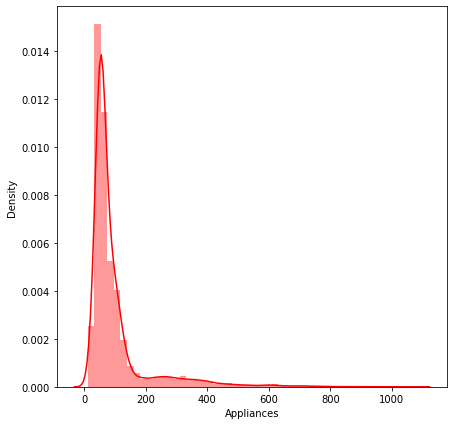

In [ ]:
# Dependent variable 'Appliances'
plt.figure(figsize=(7,7))
sns.distplot(dataset['Appliances'],color="r")

Applying log transformation to the dependent variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


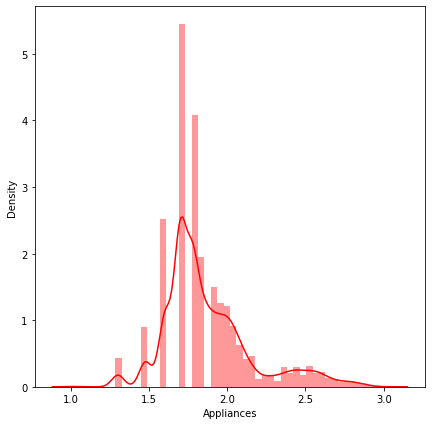

In [ ]:
#log Trasformation
# Dependent variable 'Appliances'
plt.figure(figsize=(7,7))
sns.distplot(np.log10(dataset['Appliances']),color="r")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


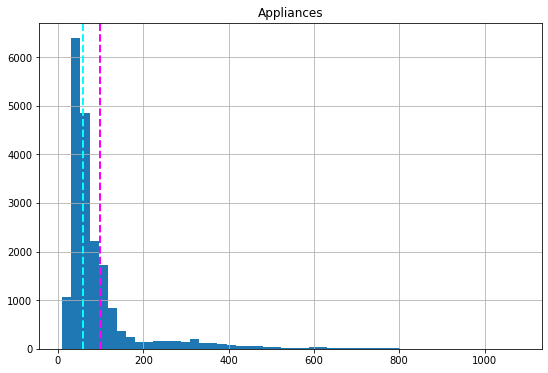

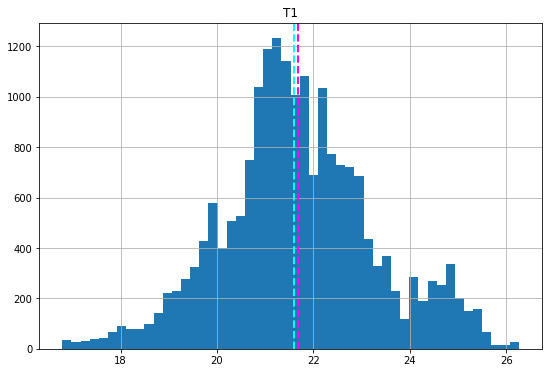

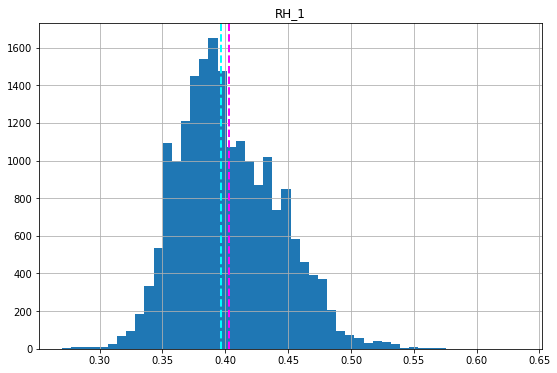

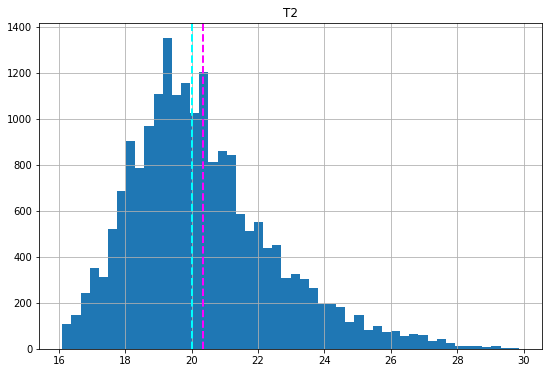

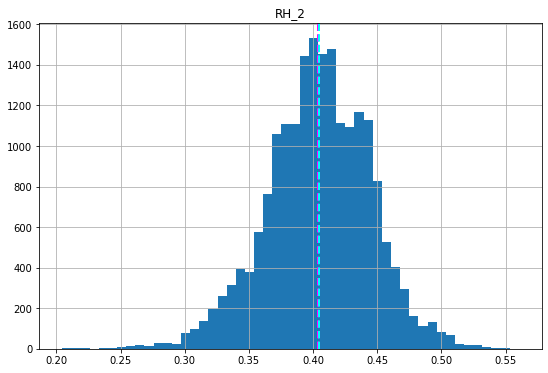

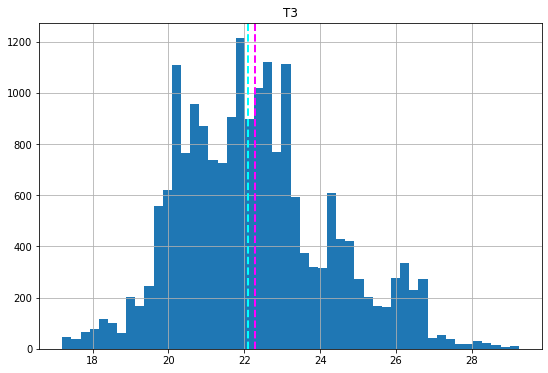

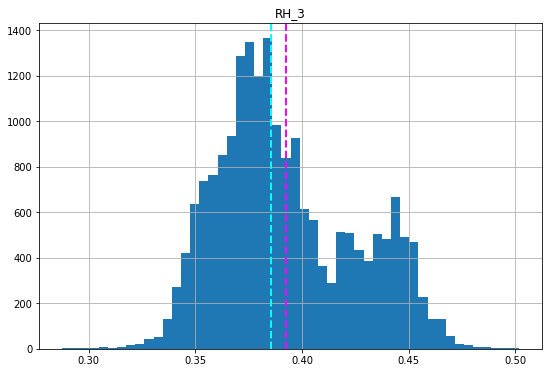

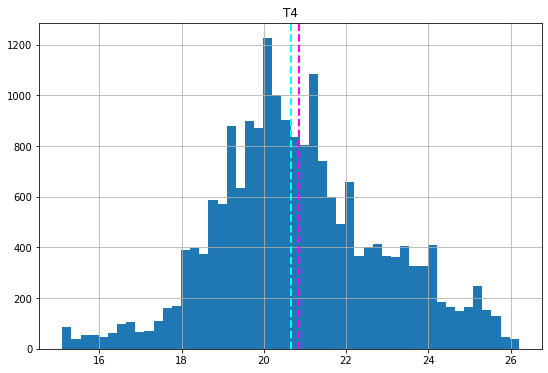

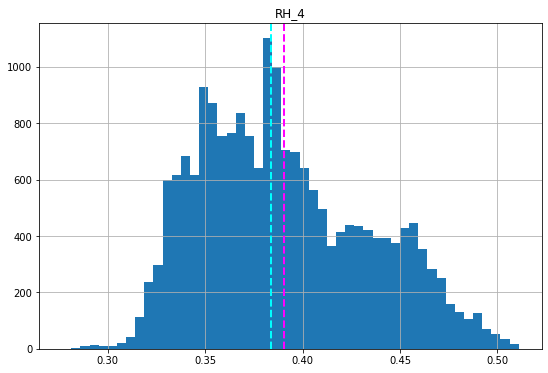

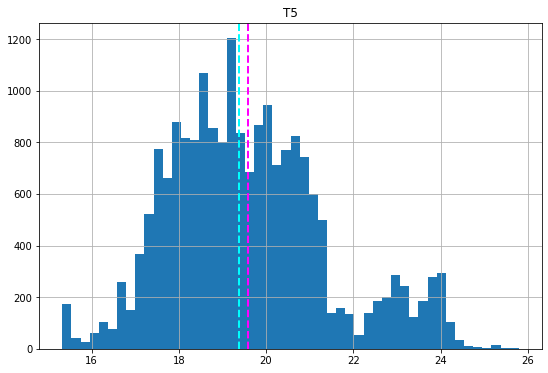

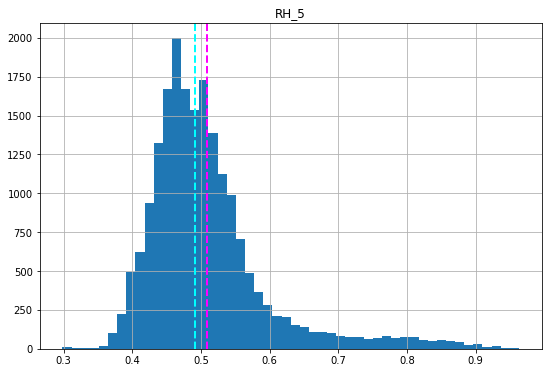

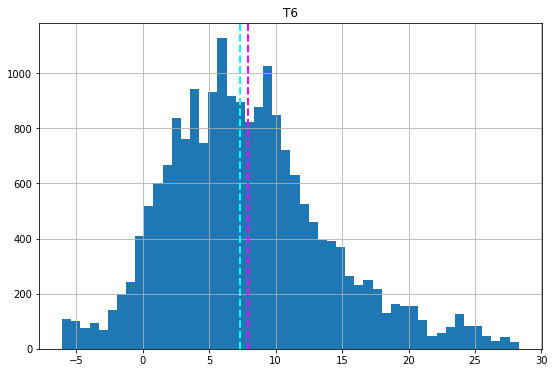

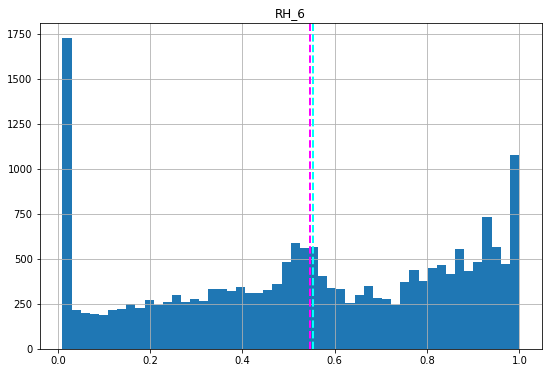

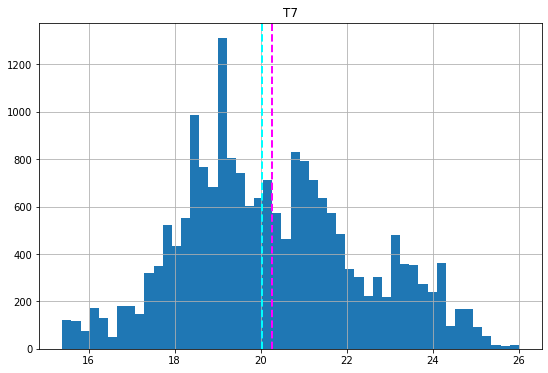

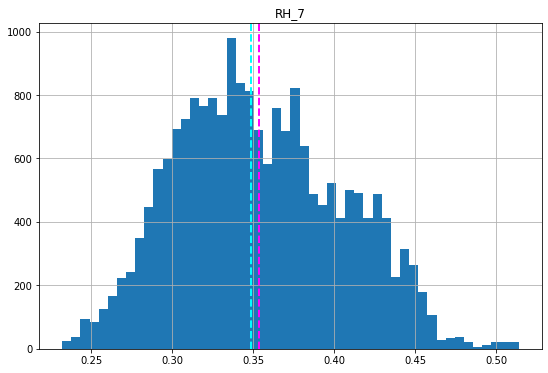

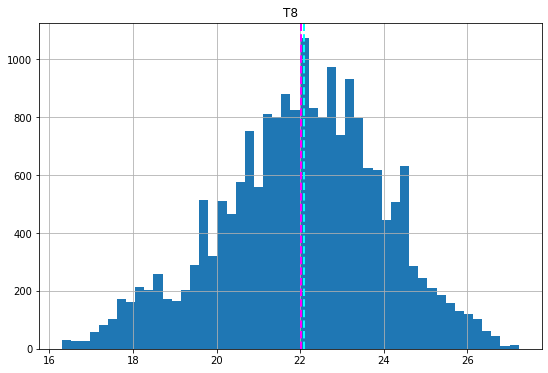

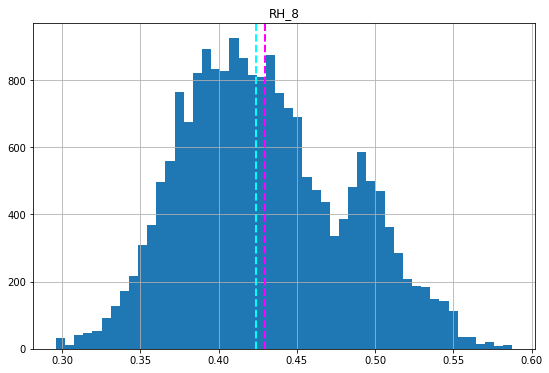

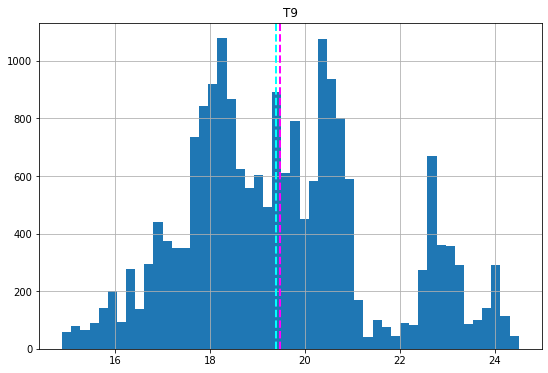

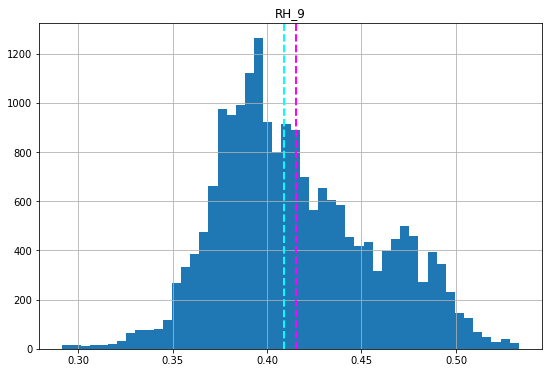

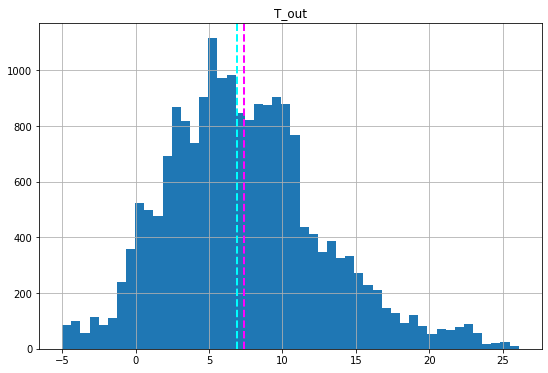

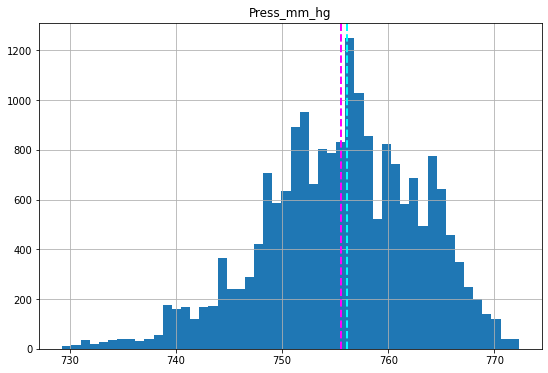

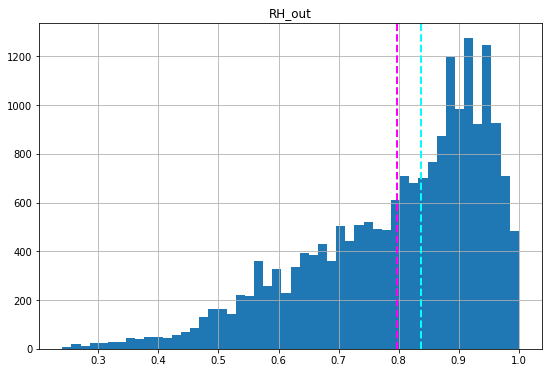

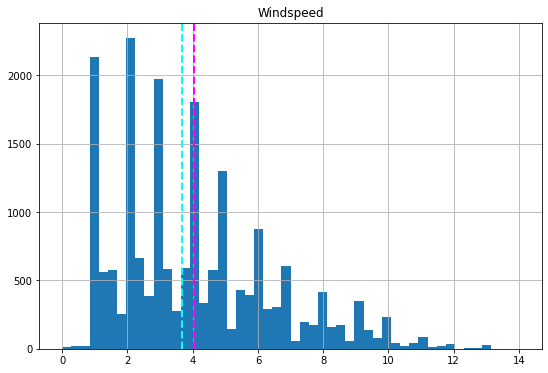

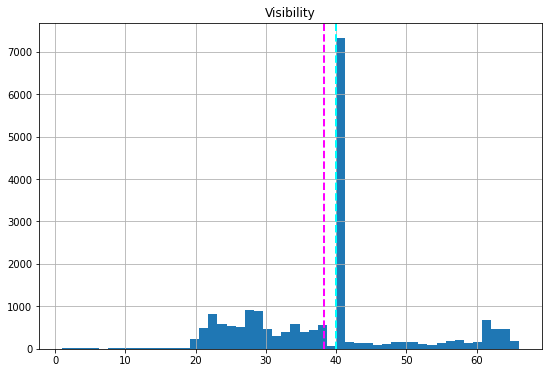

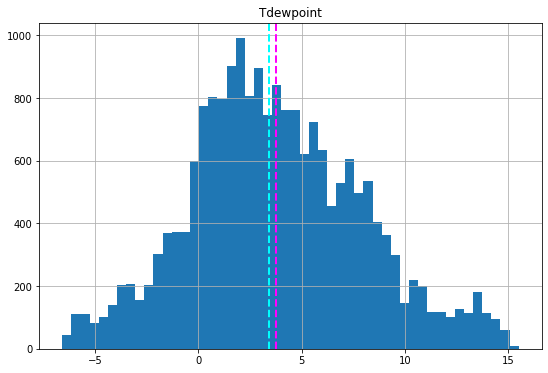

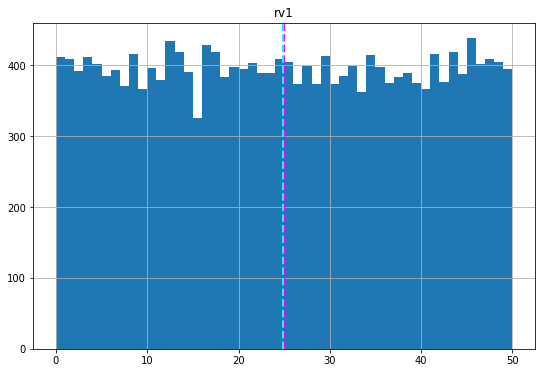

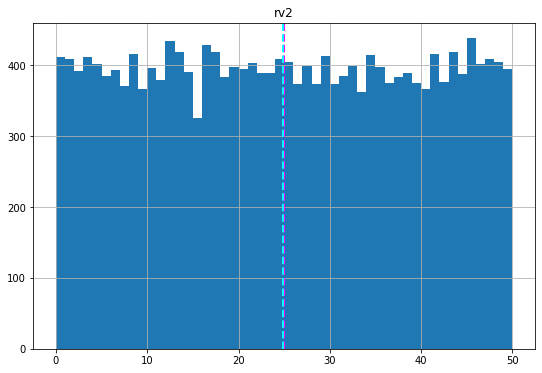

In [ ]:
#@title Default title text
# plot a bar plot for each numerical feature count (except car_ID)

for col in numeric_features[0:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

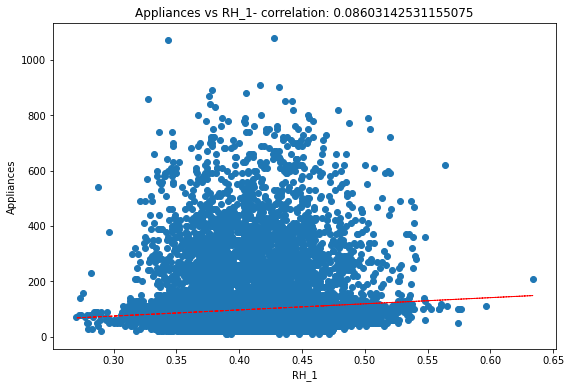

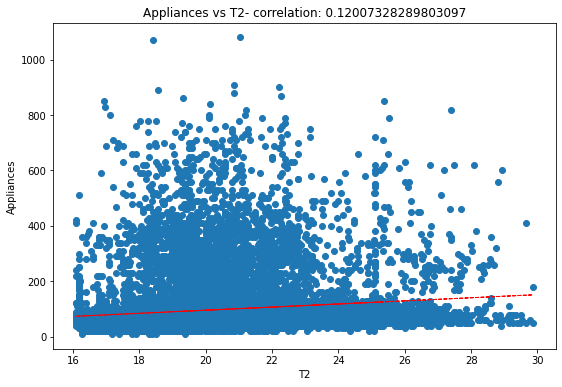

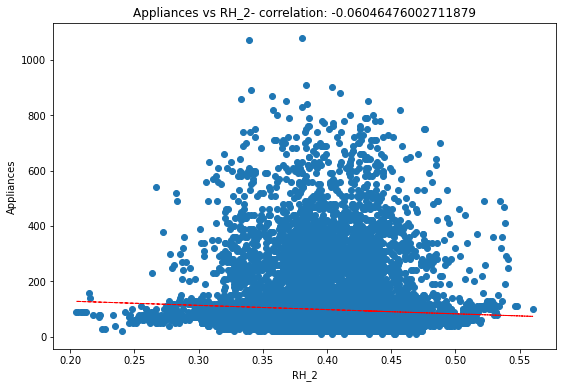

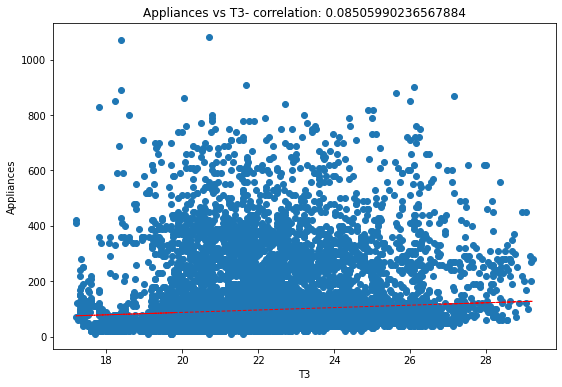

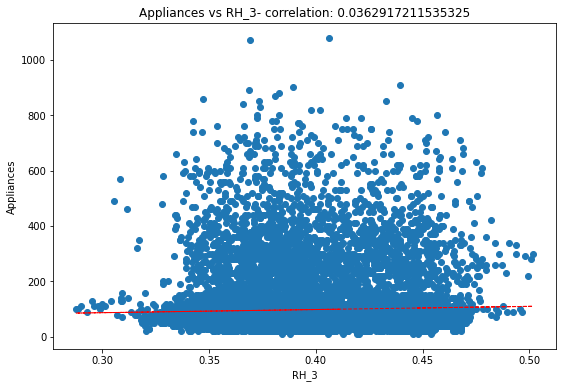

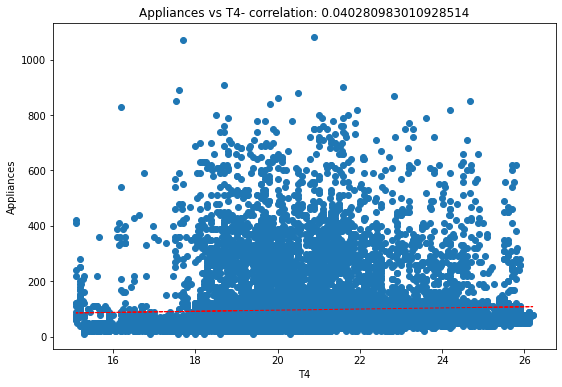

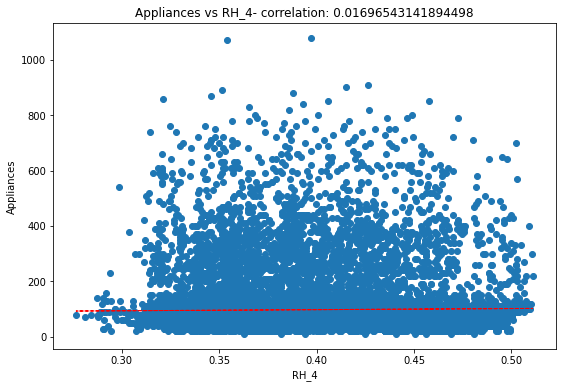

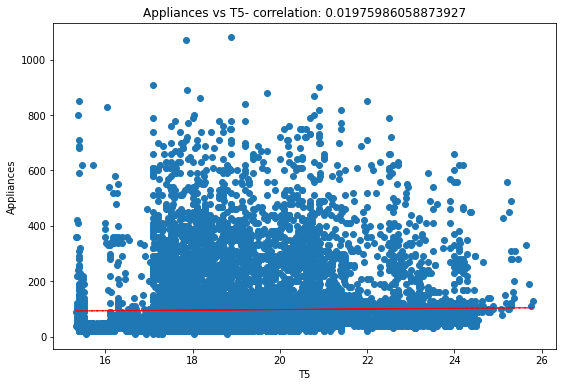

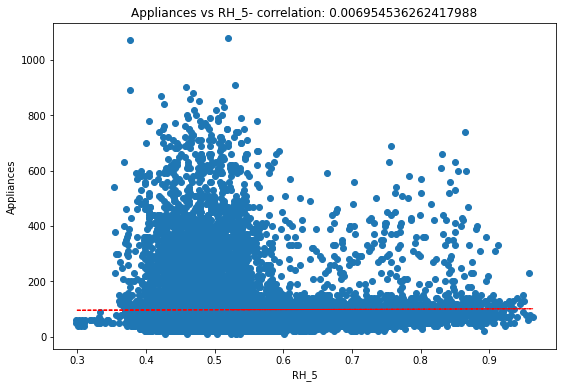

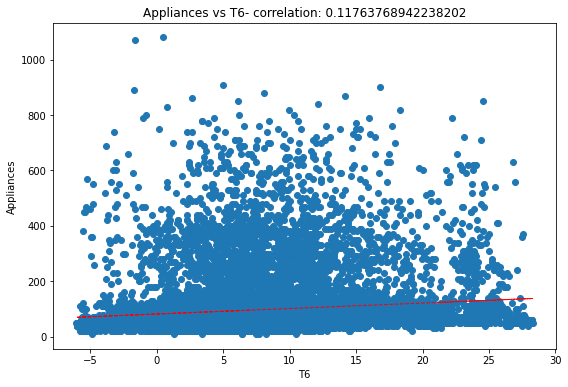

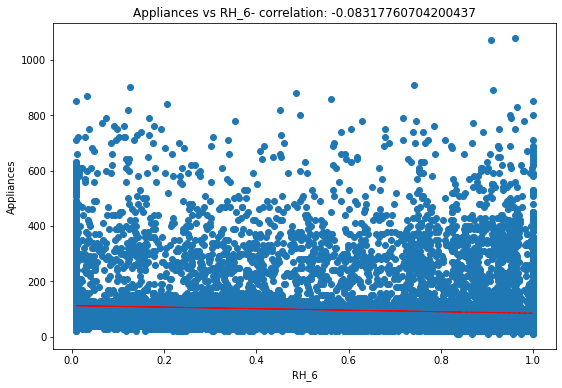

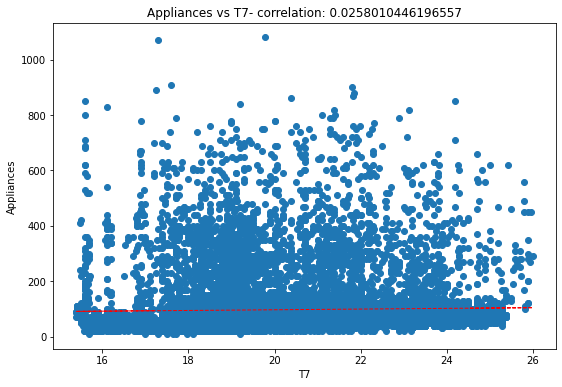

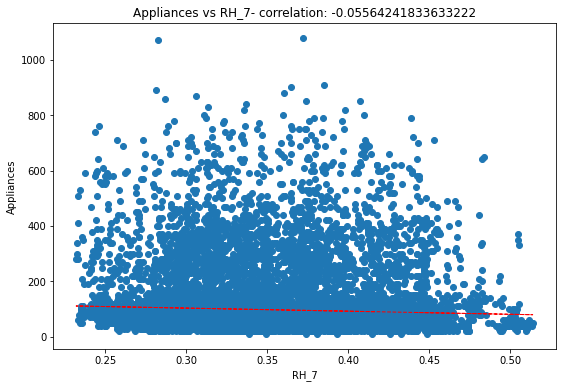

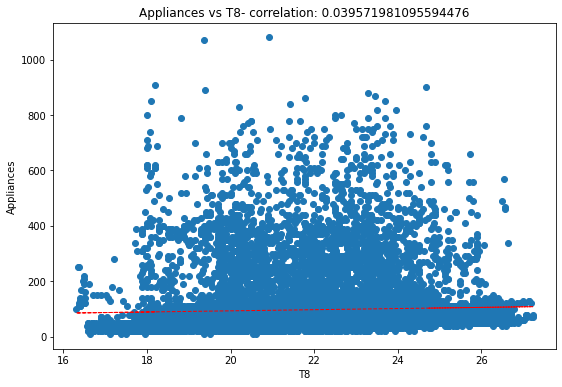

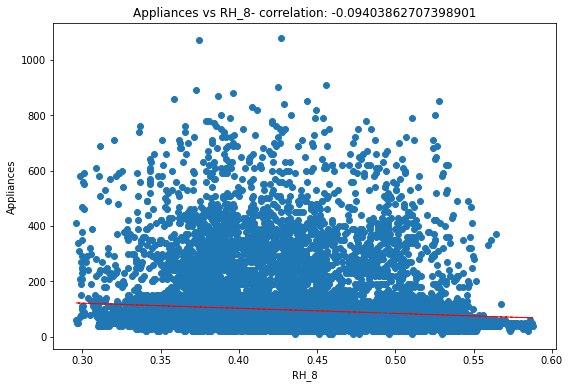

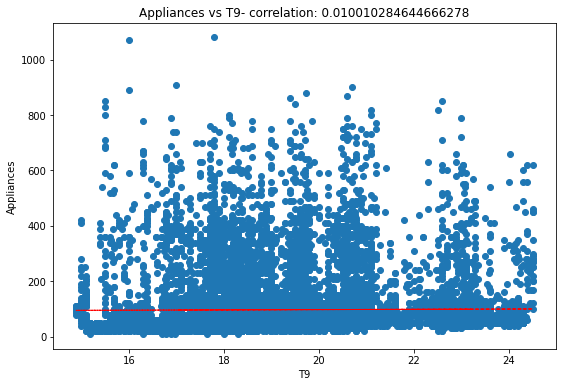

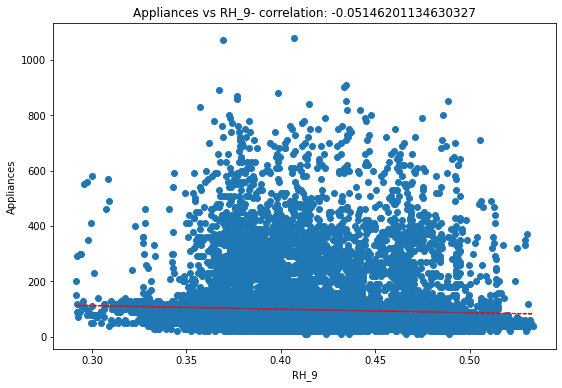

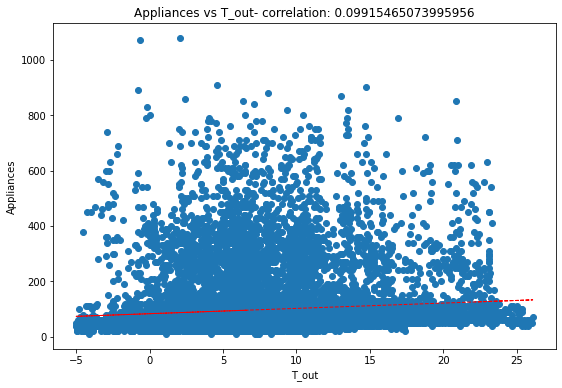

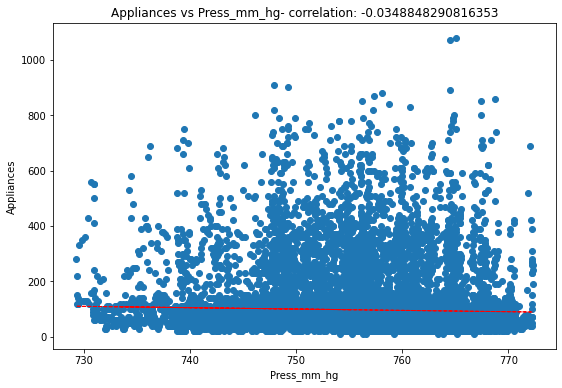

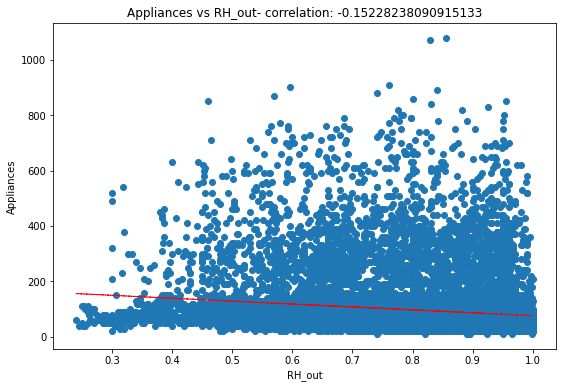

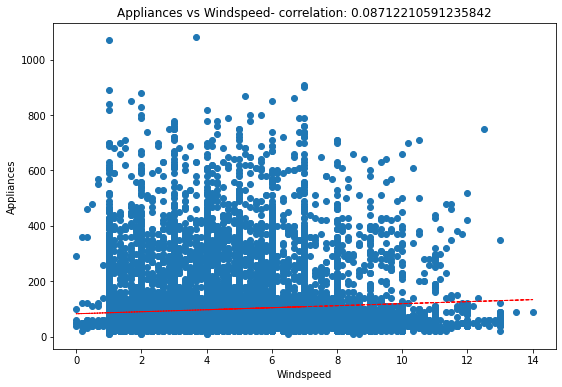

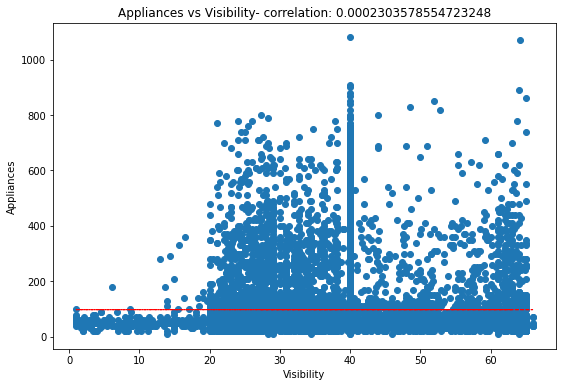

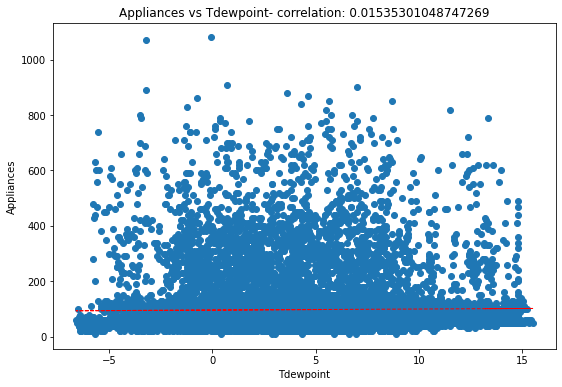

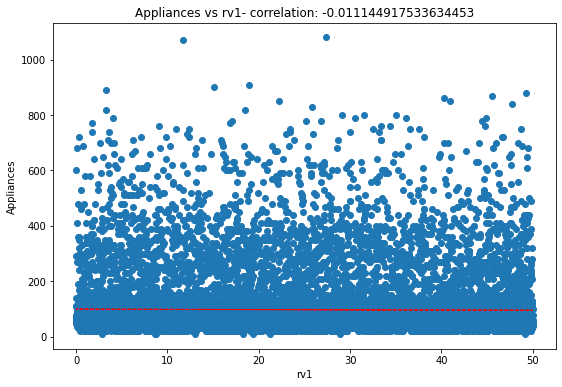

In [ ]:
for col in numeric_features[2:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Appliances']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Appliances')
    ax.set_title('Appliances vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Appliances'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

#**Correlation between dependent and independent variables**

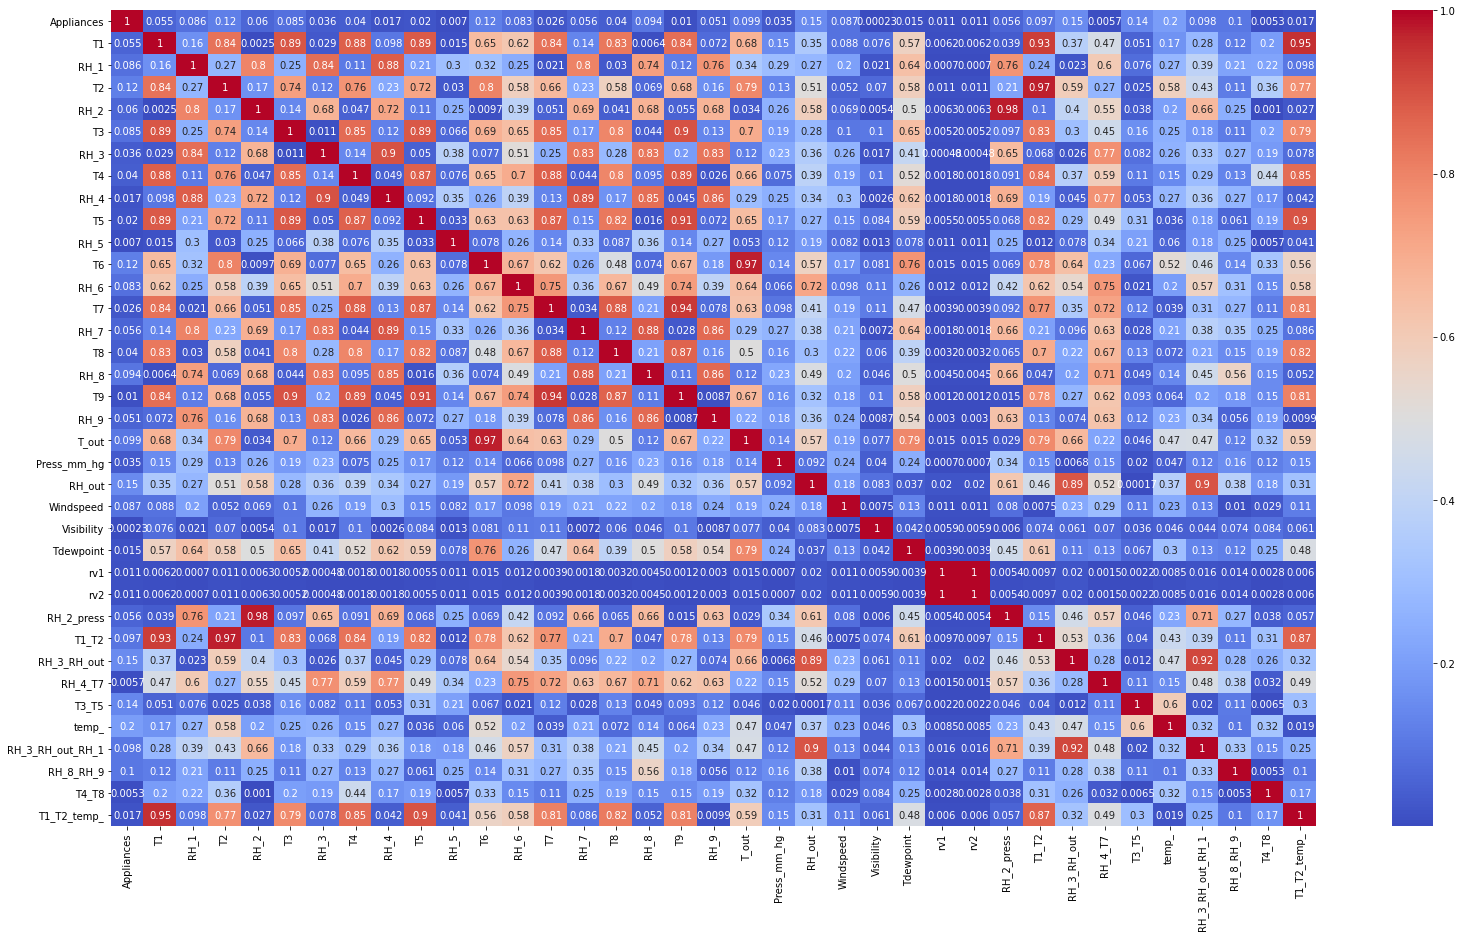

In [ ]:
## Correlation
plt.figure(figsize=(27,15))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
correlation

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,RH_2_press,T1_T2,RH_3_RH_out,RH_4_T7,T3_T5,temp_,RH_3_RH_out_RH_1,RH_8_RH_9,T4_T8,T1_T2_temp_
Appliances,1.000000,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,0.019760,0.006955,0.117638,-0.083178,0.025801,-0.055642,0.039572,-0.094039,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145,0.055746,0.097296,0.149796,0.005694,0.138116,0.196871,0.097982,0.099842,-0.005256,-0.016803
T1,0.055447,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,-0.014782,0.654769,-0.615045,0.838705,0.135182,0.825413,-0.006441,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203,0.039084,0.934273,0.373303,0.470076,-0.051066,0.168438,0.279235,0.117070,-0.195324,-0.953624
RH_1,0.086031,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,0.303258,0.316141,0.245126,0.021397,0.801122,-0.030053,0.736196,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699,-0.764112,0.242173,-0.023287,-0.603037,0.075991,0.273876,-0.393515,-0.212659,-0.215364,-0.098477
T2,0.120073,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,0.029595,0.801186,-0.580372,0.663660,0.229212,0.578191,0.068534,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087,0.211677,0.974787,0.590407,0.273473,-0.024787,0.575652,0.434788,0.111684,-0.360043,-0.772733
RH_2,-0.060465,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,0.250271,-0.009670,0.389933,-0.051422,0.690584,-0.041023,0.679777,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275,-0.978427,-0.103945,-0.403867,-0.553343,0.038172,-0.201121,-0.660977,-0.248101,0.001016,0.026909
T3,0.085060,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,-0.066355,0.686882,-0.647672,0.847374,0.172624,0.795283,0.044427,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194,-0.097347,0.830311,0.301901,0.445967,0.159230,0.250740,0.178254,0.110376,-0.199361,-0.788701
RH_3,0.036292,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,0.375422,0.076833,0.514912,-0.250090,0.832685,-0.283228,0.828822,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477,-0.654661,0.067877,-0.026336,-0.771608,0.082340,0.258258,-0.332807,-0.269749,-0.190582,0.077563
T4,0.040281,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,-0.076489,0.652350,-0.703149,0.877763,0.043527,0.796256,-0.095192,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815,0.090987,0.839555,0.367652,0.588043,-0.109461,0.148122,0.293620,0.129676,-0.438636,-0.849355
RH_4,0.016965,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,0.352591,0.259047,0.392178,-0.131204,0.894301,-0.167066,0.847259,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787,-0.690809,0.189931,-0.045062,-0.767373,0.053022,0.273951,-0.362714,-0.272254,-0.166192,-0.042093
T5,0.019760,0.885247,0.205797,0.720550,0.110409,0.888169,-0.050062,0.871813,0.091812,1.000000,0.032786,0.629161,-0.632384,0.870624,0.148905,0.824981,0.016388,0.911055,0.072308,0.651321,-0.170999,-0.273953,-0.145011,-0.084164,0.588362,-0.005490,-0.005490,-0.068241,0.819614,0.286898,0.485232,-0.309950,-0.036016,0.183831,0.061062,-0.188256,-0.898097


#**checking multicollinearity**

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Appliances']]])

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,T1,3603.955627
1,RH_1,1638.935566
2,T2,2490.023473
3,RH_2,2163.849100
4,T3,1239.191589
5,RH_3,1567.810560
6,T4,932.769026
7,RH_4,1357.805623
8,T5,1187.570988
9,RH_5,45.083892


Removing high multicollinearity

In [ ]:
dataset['RH_2_press'] = dataset['Press_mm_hg']/dataset['RH_2']

In [ ]:
dataset['T1_T2'] = dataset['T2']*dataset['T1']

In [ ]:
dataset['RH_3_RH_out'] = dataset['RH_3']/dataset['RH_out']

In [ ]:
dataset['RH_4_T7'] = dataset['T7']/dataset['RH_4']

In [ ]:
dataset['T3_T5'] = dataset['T3']/dataset['T5']

In [ ]:
dataset['temp_'] = dataset['T3_T5']/dataset['T1_T2']

In [ ]:
dataset['RH_3_RH_out_RH_1'] = dataset['RH_3_RH_out']/dataset['RH_1']

In [ ]:
dataset['RH_8_RH_9'] = dataset['RH_9']/dataset['RH_8']

In [ ]:
dataset['T4_T8'] = dataset['T8']/dataset['T4'] 

In [ ]:
dataset['RH_6_RH_7'] = dataset['RH_7']/dataset['RH_8']

In [ ]:
dataset['T6_T_out'] = dataset['T_out']/dataset['T6']

In [ ]:
dataset.drop(['T1_T2_temp_'],axis=1,inplace=True)

In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Appliances','rv1','rv2','T9','RH_2','Press_mm_hg','T1','T2','RH_3','RH_out',
'RH_4','T7','T3','T5','T3_T5','RH_3_RH_out','RH_1','RH_8','RH_9','T8','T4','RH_7','Visibility','T_out','RH_2_press','RH_8_RH_9','T4_T8','T1_T2']]])

,variables,VIF
0,RH_5,32.840462
1,T6,56.082843
2,RH_6,22.920048
3,Windspeed,4.550757
4,Tdewpoint,19.587702
5,RH_4_T7,74.140296
6,temp_,151.003566
7,RH_3_RH_out_RH_1,68.015458


In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Appliances','rv1','rv2','T9','T1','Press_mm_hg','RH_3','RH_2','RH_4','T7','T5'
,'T4','RH_9','T8','T3','RH_7','RH_1','RH_8','T2','T6','RH_5','Visibility','RH_6','Tdewpoint']]])

,variables,VIF
0,T_out,3.525152
1,RH_out,58.045732
2,Windspeed,3.772458
3,RH_2_press,72.868661
4,T1_T2,198.660785


In [ ]:
X = dataset[['RH_5','T6','RH_6','Windspeed','Tdewpoint','RH_4_T7','temp_','RH_3_RH_out_RH_1']]

In [ ]:
Y = dataset['Appliances']

#**Data Preprocessing and Train Test Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y , test_size = 0.25,random_state = 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(14801, 8)
(4934, 8)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**Fitting linear regression on basis of new features**

In [ ]:
reg = LinearRegression().fit(X_train, Y_train)

In [ ]:
reg.score(X_train,Y_train)

0.05870279827160341

In [ ]:
Y_pred = reg.predict(X_test)

In [ ]:
reg.coef_

array([  29.96274556,  232.81139061,    4.84560686,   29.0544125 ,
       -196.12790272,   17.77504597,  115.00192945, -203.28846755])

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((Y_test),(Y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 10662.879846039155
RMSE : 103.26122140493572


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score((Y_test), (Y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (Y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.0541573520602191
Adjusted R2 :  0.05262095791128141


#**Fitting all Models on the basis of new features**

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
models = [
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR: ' , SVR(kernel='rbf')],
           ['RandomForest:',RandomForestRegressor()],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] 
           
         ]

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,fit_model in models :
    fit_model_data = {}
    fit_model.random_state = 78
    fit_model_data["Name"] = name
    fit_model.fit(X_train,Y_train)
    fit_model_data["Train_R2_Score"] = r2_score(Y_train,fit_model.predict(X_train))
    fit_model_data["Test_R2_Score"] = r2_score(Y_test,fit_model.predict(X_test))
    fit_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(Y_test,fit_model.predict(X_test)))
    fit_model_data["Train_RMSE_Score"] = sqrt(mean_squared_error(Y_train,fit_model.predict(X_train)))
    model_data.append(fit_model_data)


[10:46:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
model_data

[{'Name': 'Ridge: ',
  'Test_R2_Score': 0.05396190978849069,
  'Test_RMSE_Score': 103.27188944009893,
  'Train_R2_Score': 0.05863717351992259,
  'Train_RMSE_Score': 98.25504836662044},
 {'Name': 'KNeighborsRegressor: ',
  'Test_R2_Score': 0.41593691269508215,
  'Test_RMSE_Score': 81.14423895262466,
  'Train_R2_Score': 0.6769104937074015,
  'Train_RMSE_Score': 57.56225219280667},
 {'Name': 'SVR:',
  'Test_R2_Score': -0.04926860549702283,
  'Test_RMSE_Score': 108.76048883635231,
  'Train_R2_Score': -0.039932643143626656,
  'Train_RMSE_Score': 103.27113661415025},
 {'Name': 'RandomForest ',
  'Test_R2_Score': 0.4704068724559092,
  'Test_RMSE_Score': 77.26787736384733,
  'Train_R2_Score': 0.9318256660828884,
  'Train_RMSE_Score': 26.44154351197606},
 {'Name': 'GradientBoostingRegressor: ',
  'Test_R2_Score': 0.1641638376106488,
  'Test_RMSE_Score': 97.07075108005687,
  'Train_R2_Score': 0.2392339354374995,
  'Train_RMSE_Score': 88.32871603005437},
 {'Name': 'XGBRegressor: ',
  'Test_R2_Sco

In [ ]:
df = pd.DataFrame(model_data)

In [ ]:
ab = df.sort_values(by = 'Train_R2_Score',ascending= False)

In [ ]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(x_poly, Y_train)
y_poly_pred = model.predict(x_poly)

rmse= np.sqrt(mean_squared_error(Y_train,y_poly_pred))
r2 = r2_score(Y_train,y_poly_pred)
print("Train_RMSE= ",rmse)
print("Train_R2_Score =",r2)

Train_RMSE=  84.97735444619983
Train_R2_Score = 0.2958686034714304


In [ ]:
polynomial_features3= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X_test)

model = LinearRegression()
model.fit(x_poly, Y_test)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(Y_test,y_poly_pred))
r2 = r2_score(Y_test,y_poly_pred)
print("Test_RMSE= ",rmse)
print("Test_R2_Score =",r2)

Test_RMSE=  86.83598043902524
Test_R2_Score = 0.33112679073491424


#**Fitting models on all feaṭures except rv1,rv2,Visibility**

In [ ]:
X_ = dataset[['T1','RH_1','T2','RH_2','T3','RH_3','T4',	'RH_4',	'T5','T6','T9','RH_5','RH_6','T7','RH_7',	'T8',	'RH_8',	'RH_9','T_out',	'Press_mm_hg',	'RH_out','Windspeed','Tdewpoint'	]]

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_, Y, test_size = 0.25, random_state = 0)

In [ ]:
#Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
reg = LinearRegression().fit(X_train, Y_train)

In [ ]:
reg.score(X_train,Y_train)

0.1513810432092647

In [ ]:
Y_pred = reg.predict(X_test)
Y_pred

array([206.68086645,  86.22920345, 144.80955816, ...,  86.42885306,
       130.25949589,  98.53328317])

In [ ]:
reg.coef_

array([   7.92043281,  572.75379601, -256.70186818, -491.90500181,
        313.35838853,  110.19072868,   12.36777673,   30.9805829 ,
          7.59330859,  252.86105026, -221.23125866,   14.57238753,
         34.03498008,   14.72106435,  -44.70682079,  106.58362408,
       -180.11917944,  -37.85316943, -321.85232691,    9.41121734,
        -64.92182597,   27.73719012,  116.49907569])

In [ ]:
MSE  = mean_squared_error((Y_test),(Y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 9813.560295509407
RMSE : 99.06341552515443


In [ ]:
r2 = r2_score((Y_test), (Y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (Y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.12949559690769186
Adjusted R2 :  0.1254178777078705


**Not getting proper results on new features which created**

#**Fitting Regularized Linear regression (lasso)**

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, Y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso.score(X_train, Y_train)

0.15138099638357416

In [ ]:
lasso.coef_

array([   7.73391846,  572.49845632, -256.26490769, -491.39953625,
        313.33089013,  110.12956029,   12.32773887,   30.91496827,
          7.50668536,  252.51272784, -221.15761381,   14.57503868,
         33.97309648,   14.65724492,  -44.66773683,  106.58585792,
       -180.13259134,  -37.8502136 , -320.59291301,    9.40844414,
        -64.39141763,   27.75687266,  115.72820881])

In [ ]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51602154.1003247, tolerance: 12150.269969594592
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51440416.821937166, tolerance: 12117.713068153038
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51762736.73730861, tolerance: 12316.076358415696
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51414339.

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0014}

Using  {'alpha': 0.0014}  the negative mean squared error is:  -8739.301342312761


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_train = lasso_regressor.predict(X_train)

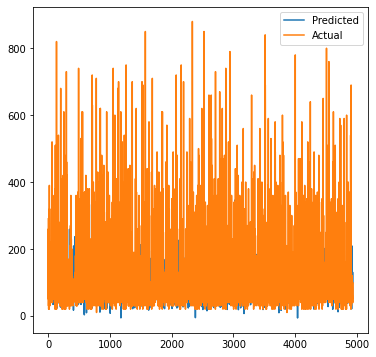

In [ ]:
plt.figure(figsize=(6,6))
plt.plot((y_pred_lasso))
plt.plot((np.array(Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

For test data

In [ ]:
MSE  = mean_squared_error((Y_test), (y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

test_r2 = r2_score((Y_test), (y_pred_lasso))
print("Test_R2 :" ,test_r2)
print("Test_Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


MSE : 9814.310092434187
RMSE : 99.06719988186902
Test_R2 : 0.12942908674167752
Test_Adjusted R2 :  0.12535105598710705


For train Data

In [ ]:
MSE2  = mean_squared_error((Y_train), (y_pred_train))
print("MSE :" , MSE2)

RMSE2 = np.sqrt(MSE2)
print("RMSE :" ,RMSE2)

train_r2 = r2_score((Y_train), (y_pred_train))
print("Train_R2 :" ,train_r2)
print("Train_Adjusted R2 : ",1-(1-r2_score((Y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE : 8703.022931059208
RMSE : 93.28999373490818
Train_R2 : 0.1513718676183724
Train_Adjusted R2 :  0.1500510009306294


#**Fitting all models** 

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
models = [
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] 
           
         ]

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,fit_model in models :
    fit_model_data = {}
    fit_model.random_state = 78
    fit_model_data["Name"] = name
    fit_model.fit(X_train,Y_train)
    fit_model_data["Train_R2_Score"] = r2_score(Y_train,fit_model.predict(X_train))
    fit_model_data["Test_R2_Score"] = r2_score(Y_test,fit_model.predict(X_test))
    fit_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(Y_test,fit_model.predict(X_test)))
    fit_model_data["Train_RMSE_Score"] = sqrt(mean_squared_error(Y_train,fit_model.predict(X_train)))
    model_data.append(fit_model_data)


[11:15:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
model_data

[{'Name': 'Ridge: ',
  'Test_R2_Score': 0.1280322792437637,
  'Test_RMSE_Score': 99.14664335057847,
  'Train_R2_Score': 0.1505389155517054,
  'Train_RMSE_Score': 93.3357658651244},
 {'Name': 'KNeighborsRegressor: ',
  'Test_R2_Score': 0.43695410040887117,
  'Test_RMSE_Score': 79.67089786082838,
  'Train_R2_Score': 0.6892082038188814,
  'Train_RMSE_Score': 56.45613263858863},
 {'Name': 'SVR:',
  'Test_R2_Score': -0.016473224085909788,
  'Test_RMSE_Score': 107.04731607066262,
  'Train_R2_Score': -0.0021073173939873957,
  'Train_RMSE_Score': 101.3756071426106},
 {'Name': 'RandomForest ',
  'Test_R2_Score': 0.5154644730023594,
  'Test_RMSE_Score': 73.90785947609952,
  'Train_R2_Score': 0.9397287365129177,
  'Train_RMSE_Score': 24.861738803783297},
 {'Name': 'GradientBoostingRegressor: ',
  'Test_R2_Score': 0.2322501929101436,
  'Test_RMSE_Score': 93.03313790948422,
  'Train_R2_Score': 0.33783729168257237,
  'Train_RMSE_Score': 82.40597663740003},
 {'Name': 'XGBRegressor: ',
  'Test_R2_Scor

In [ ]:
df = pd.DataFrame(model_data)

In [ ]:
ab = df.sort_values(by = 'Train_R2_Score',ascending= False)
ab

,Name,Train_R2_Score,Test_R2_Score,Test_RMSE_Score,Train_RMSE_Score
3,RandomForest,0.939729,0.515464,73.907859,24.861739
1,KNeighborsRegressor:,0.689208,0.436954,79.670898,56.456133
4,GradientBoostingRegressor:,0.337837,0.232250,93.033138,82.405977
5,XGBRegressor:,0.330370,0.228798,93.242037,82.869309
0,Ridge:,0.150539,0.128032,99.146643,93.335766
2,SVR:,-0.002107,-0.016473,107.047316,101.375607
